✅ Operating Point: Q = 2727.73 STB/day, Pwf = 1264.56 psia


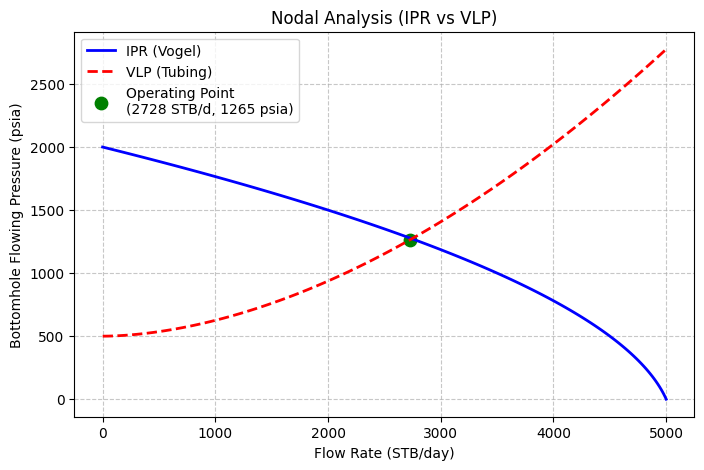

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. USER INPUTS
# -------------------------------
Pr = 2000  # Reservoir pressure (psia)
Qmax = 5000  # Maximum flow rate (STB/day)
Pwh = 500  # Wellhead pressure (psia)
a = 0.0005    # Tubing correlation constant
b = 1.8    # Tubing exponent

# -------------------------------
# 2. IPR FUNCTION (Vogel)
# -------------------------------
def ipr_vogel(Pwf, Pr, Qmax):
    return Qmax * (1 - 0.2*(Pwf/Pr) - 0.8*(Pwf/Pr)**2)

# -------------------------------
# 3. VLP FUNCTION
# -------------------------------
def vlp_tubing(Q, Pwh, a, b):
    return Pwh + a * (Q**b)

# -------------------------------
# 4. GENERATE DATA
# -------------------------------
Pwf_range = np.linspace(0, Pr, 100)
Q_ipr = ipr_vogel(Pwf_range, Pr, Qmax)

Q_range = np.linspace(1, Qmax, 100)
Pwf_vlp = vlp_tubing(Q_range, Pwh, a, b)

# -------------------------------
# 5. FIND OPERATING POINT
# -------------------------------
# Interpolating where IPR = VLP
from scipy.interpolate import interp1d

# Interpolating IPR as Pwf vs Q
Pwf_ipr_func = interp1d(Q_ipr, Pwf_range, bounds_error=False, fill_value="extrapolate")
Pwf_ipr_at_Q = Pwf_ipr_func(Q_range)

# Find Q where |Pwf_ipr - Pwf_vlp| is minimum
diff = abs(Pwf_ipr_at_Q - Pwf_vlp)
Q_star = Q_range[np.argmin(diff)]
Pwf_star = Pwf_vlp[np.argmin(diff)]

print(f"✅ Operating Point: Q = {Q_star:.2f} STB/day, Pwf = {Pwf_star:.2f} psia")

# -------------------------------
# 6. PLOT RESULTS
# -------------------------------
plt.figure(figsize=(8, 5))
plt.plot(Q_ipr, Pwf_range, label="IPR (Vogel)", color="blue", linewidth=2)
plt.plot(Q_range, Pwf_vlp, label="VLP (Tubing)", color="red", linestyle="--", linewidth=2)
plt.scatter(Q_star, Pwf_star, color="green", s=80, label=f"Operating Point\n({Q_star:.0f} STB/d, {Pwf_star:.0f} psia)")

plt.xlabel("Flow Rate (STB/day)")
plt.ylabel("Bottomhole Flowing Pressure (psia)")
plt.title("Nodal Analysis (IPR vs VLP)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()
